# Face Mask Detection Using Basic OpenCV operation

## OpenCV  

Open source Computer Vision Library is an open source computer vision and machine learning software library.It has more than 2500 optimized algorithms.We are using openCV to load images in python and convert them into an array.It has C++, python, Java and MATLAB interfaces and supports Windows, Linux, Andriod, and MacOS.Here, in each index of array represents (red, green, blue) color pixel which ranges from 0 to 255.

### Features of OpenCV 

Face Detection,
Geometric Transformation,
Image Thresholding,
Amoothing Images,
Canny Egde Detection,
Background Removals,
Image Segmentation.

#### Installing OpenCV

In [1]:
!pip install opencv-python

#### importing openCV library

In [2]:
import cv2

In [3]:
#creating a variable to read the image and give the image of the image which needs to be read
img = cv2.imread('sad_women.jpg')
#imread is the method used to read the image

In [4]:
#checking the dimension of the image
img.shape
#(width,height,rgb channel)

(480, 852, 3)

In [5]:
#checking the first row of the image
img[0]

array([[49, 55, 60],
       [48, 54, 59],
       [48, 54, 59],
       ...,
       [32, 36, 37],
       [32, 36, 37],
       [32, 36, 37]], dtype=uint8)

In [6]:
#printing all the color values of each pixel of the image
img

array([[[ 49,  55,  60],
        [ 48,  54,  59],
        [ 48,  54,  59],
        ...,
        [ 32,  36,  37],
        [ 32,  36,  37],
        [ 32,  36,  37]],

       [[ 49,  55,  60],
        [ 48,  54,  59],
        [ 48,  54,  59],
        ...,
        [ 32,  36,  37],
        [ 32,  36,  37],
        [ 32,  36,  37]],

       [[ 49,  55,  60],
        [ 48,  54,  59],
        [ 48,  54,  59],
        ...,
        [ 32,  36,  37],
        [ 32,  36,  37],
        [ 32,  36,  37]],

       ...,

       [[ 59,  71,  59],
        [ 59,  71,  59],
        [ 59,  71,  59],
        ...,
        [110,  85,  53],
        [110,  85,  53],
        [110,  85,  53]],

       [[ 59,  71,  59],
        [ 59,  71,  59],
        [ 59,  71,  59],
        ...,
        [109,  84,  52],
        [109,  84,  52],
        [109,  84,  52]],

       [[ 60,  72,  60],
        [ 60,  72,  60],
        [ 60,  72,  60],
        ...,
        [106,  82,  52],
        [106,  82,  52],
        [106,  82,  52]]

## MatplotLib

This library is used in python to visualize the image. It is graph library used to represent histogram, bar graph,pie charts etc.

#### importing the library matplotlib

In [7]:
import matplotlib.pyplot as plt

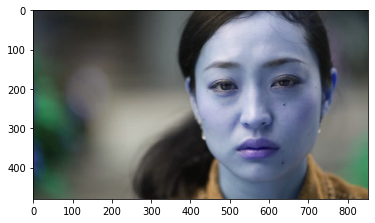

In [8]:
#plt.imshow is a method used to picturize the image
plt.imshow(img)###the image that cv2 deal is with BGR

The picture is taken as an array and it is represented as a graph that is why the image has lost its rgb color.

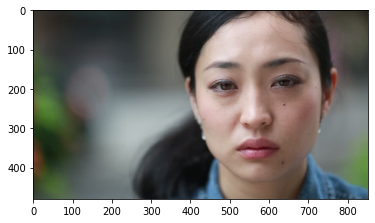

In [9]:
#coverting BGR graph into RGB graph
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
#creating while loop to open the above image in the window and for closing we have to click the esc button
while True:
    cv2.imshow('result',img)
    #27 is the ASCII value of escape
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

The function of the waitKey is to used to wait for a key event infinitely and delay it for some millisecond, and here we are delaying the event by 2 millisecond. Since, the OS has minimium time switching the threads.

destroyAllWindows() simply destroys all the windows that we have created

## Haar Cascade 

It is an object Detection algorthim used for identifying faces in an image or a real time video. It uses line detection or edge features by Viola and Jones. As we are here dealing with the face mask detection so we are only using haar cascade to detect the frontal face.

cv2.CascadeClassifier is used to load the xml file of Haar Cascade            

In [13]:
#creating a variable to pass the haarcascade xml file
haar_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [14]:
haar_data.detectMultiScale(img)

array([[371,  36, 395, 395]], dtype=int32)

In [15]:
#(x,y,w,h) is given above of the image which is loaded before.

DetectMultiScale is a predefined method performs all the calculations sliding window and finds the haar features in every sliding windows.

cv2.rectangle(img,(x,y),(w,h),(b,g,r),border_thickness)
it is used to create a rectangle over a face in the window

In [16]:
#drawing rectangle over the face that loads in the window
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
         #drawing pink background rectangle
        cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,255), 4)
    cv2.imshow('result',img)
    #27 is the ASCII value of escape
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

#### Collecting data of own to detect whether wearing a mask or not

Here, the flag variable contains either true or false. It gives true if the camera is working and false if the camera is not working, couldn't find the camera.

We are detecting own face and capturing our face for 199 times without mask first, saving the data and same for with mask later on and saving the data.Now , it will slice the face of the particular array and store it in a data variable.

capture.release() it releases the camera that we are holding

In [21]:
capture = cv2.VideoCapture(0)#starting the camera 0 passed for the default camera.
#whereas, if there is another camera we have to pass 1 instead of 0.
data = []
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,255), 4)
            #fetching face of the particular image
            face = img[y:y+h, x:x+w, :]#: is used for color channel
            face = cv2.resize(face, (50,50))#resizing all the faces to the same dimension
            #we are trying to collect 400 faces altogether
            print(len(data))
            if len(data)<400:
                data.append(face)
        cv2.imshow('result',img)
        #27 is the ASCII value of escape
        #condition to break the loop of the data after it reaches 200
        if cv2.waitKey(2) == 27 or len(data) >= 200:
            break
            
capture.release()#it releases the camera that we are holding
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


The output above is the number of picture it has clicked.

### Note: Rerun the code above again wearing a mask after saving the data without the mask ###

In [18]:
import numpy as np

np.save is used to save an array to a binary file in NumPy .npy format.

In [19]:
#it is saving the dataset of the face without mask
np.save('without_mask.npy', data)

In [22]:
#it is saving the dataset of the face with mask
np.save('with_mask.npy', data)

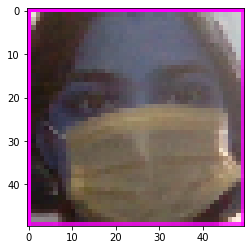

In [23]:
#displaying the data of my face
plt.imshow(data[100])

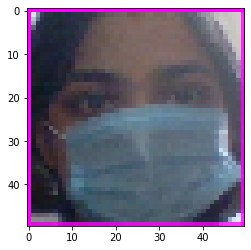

In [25]:
#coverting BGR graph into RGB graph
plt.imshow(cv2.cvtColor(data[100], cv2.COLOR_BGR2RGB))